<a href="https://colab.research.google.com/github/sunilsm7/numpy-demos/blob/main/Computation_on_arrays_ufuncs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computation on NumPy Arrays: Universal Functions

In [2]:
import numpy as np

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: unary ufuncs, which operate on a single input, and binary ufuncs, which operate on two inputs. We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used:

In [4]:
x = np.arange(4)

print("x  =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x  = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a `**` operator for exponentiation, and a `%` operator for modulus:

In [5]:
print("-x = ", -x)
print("x**2 = ", x**2)
print("x % 2  = ", x % 2)

-x =  [ 0 -1 -2 -3]
x**2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [6]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the `+` operator is a wrapper for the `add` function:

In [7]:
np.add(x, 2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

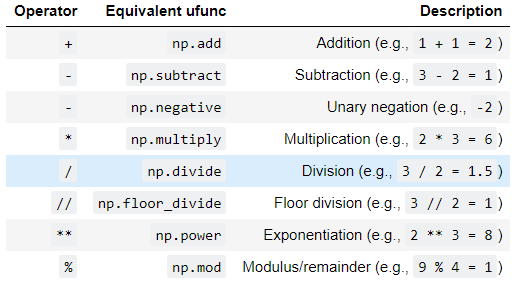

### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [8]:
x = np.array([-2, 1, 0, 1 ,2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is `np.absolute`, which is also available under the alias `np.abs`

In [9]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [10]:
np.abs(x)

array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [11]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions. We'll start by defining an array of angles:

In [13]:
theta = np.linspace(0, np.pi, 3)
print(theta)

[0.         1.57079633 3.14159265]


Now we can compute some trigonometric functions on these values:

In [14]:
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero. Inverse trigonometric functions are also available:

In [16]:
x = [-1, 0, 1]
print("x          = ", x)
print("arcsin(x)  = ", np.arcsin(x))
print("arccos(x)  = ", np.arccos(x))
print("arctan(x)  = ", np.arctan(x))

x          =  [-1, 0, 1]
arcsin(x)  =  [-1.57079633  0.          1.57079633]
arccos(x)  =  [3.14159265 1.57079633 0.        ]
arctan(x)  =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms


Another common type of operation available in a NumPy ufunc are the exponentials:

In [17]:
x = [1, 2, 3]
print("x    = ", x)
print("e^x  = ", np.exp(x))
print("2^x  = ", np.exp2(x))
print("3^x  = ", np.power(3, x))

x    =  [1, 2, 3]
e^x  =  [ 2.71828183  7.3890561  20.08553692]
2^x  =  [2. 4. 8.]
3^x  =  [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available. The basic `np.log` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [18]:
x = [1, 2, 4, 10]
print("x  =", x)
print("ln(x)  = ", np.log(x))
print("log2(x)  = ", np.log2(x))
print("log10(x) = ", np.log10(x))

x  = [1, 2, 4, 10]
ln(x)  =  [0.         0.69314718 1.38629436 2.30258509]
log2(x)  =  [0.         1.         2.         3.32192809]
log10(x) =  [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [20]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

# When x is very small, these functions give more precise values than if the raw np.log or np.exp were to be used.

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### Specialized ufuncs

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule `scipy.special`. If you want to compute some obscure mathematical function on your data, chances are it is implemented in `scipy.special`. There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [21]:
from scipy import special

In [22]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)   = ", special.gamma(x))
print("ln|gamma(x)| = ", special.gammaln(x))
print("beta(x, 2) = ", special.beta(x ,2))

gamma(x)   =  [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| =  [ 0.          3.17805383 12.80182748]
beta(x, 2) =  [0.5        0.03333333 0.00909091]


In [23]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


## ## Advanced Ufunc Features

Many NumPy users make use of ufuncs without ever learning their full set of features. We'll outline a few specialized features of ufuncs here

**Specifying output**

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the out argument of the function:

In [26]:
x = np.arange(5)
print(x)
y = np.empty(5)

np.multiply(x, 10, out=y)
print(y)

[0 1 2 3 4]
[ 0. 10. 20. 30. 40.]


If we had instead written `y[::2] = 2 ** x`, this would have resulted in the creation of a temporary array to hold the results of `2 ** x`, followed by a second operation copying those values into the y array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the `out` argument can be significant.

**Aggregates**

For binary ufuncs, there are some interesting aggregates that can be computed directly from the object. For example, if we'd like to reduce an array with a particular operation, we can use the `reduce` method of any ufunc. A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling `reduce` on the `add` ufunc returns the sum of all elements in the array:

In [29]:
x = np.arange(1, 6)
np.add.reduce(x)

15

Similarly, calling `reduce` on the `multiply` ufunc results in the product of all array elements

In [30]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use `accumulate`:

In [31]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [32]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

**Outer products**

Finally, any ufunc can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplication table:

In [33]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])